In [2]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [3]:
# load the dataset
data = pd.read_csv("data/defects.csv")

In [3]:
data.head()

,Day,Sample,Defects
0,1,08:15,12
1,1,08:30,8
2,1,08:45,9
3,1,09:00,11
4,1,09:15,9


In [4]:
data['Defects'].min()
data['Defects'].max()

np.int64(18)

In [5]:
data['Sample'].unique()

array(['08:15', '08:30', '08:45', '09:00', '09:15', '09:30', '09:45',
       '10:00', '10:15', '10:30', '10:45', '11:00', '11:15', '11:30',
       '11:45', '12:00', '12:15', '12:30', '12:45', '13:00', '13:15',
       '13:30', '13:45', '14:00', '14:15', '14:30', '14:45', '15:00',
       '15:15', '15:30', '15:45', '16:00'], dtype=object)

In [6]:
data['Day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
# create empty dataframe for aggregated data
agg_data = pd.DataFrame()
# create new column hour
agg_data['Hour'] = data['Sample'].unique()

In [8]:
# create aggregation for each day
for day in data['Day'].unique():
   agg_data['defects_day_' + str(day)] = ""
   for hour in data['Sample'].unique():
       agg_data.loc[agg_data['Hour'] == hour, 'defects_day_' + str(day)] = data[(data['Day'] == day) & (data['Sample'] == hour)]['Defects'].values
        # print(day, hour, data[(data['Day'] == day) & (data['Sample'] == hour)]['Defects'].values)

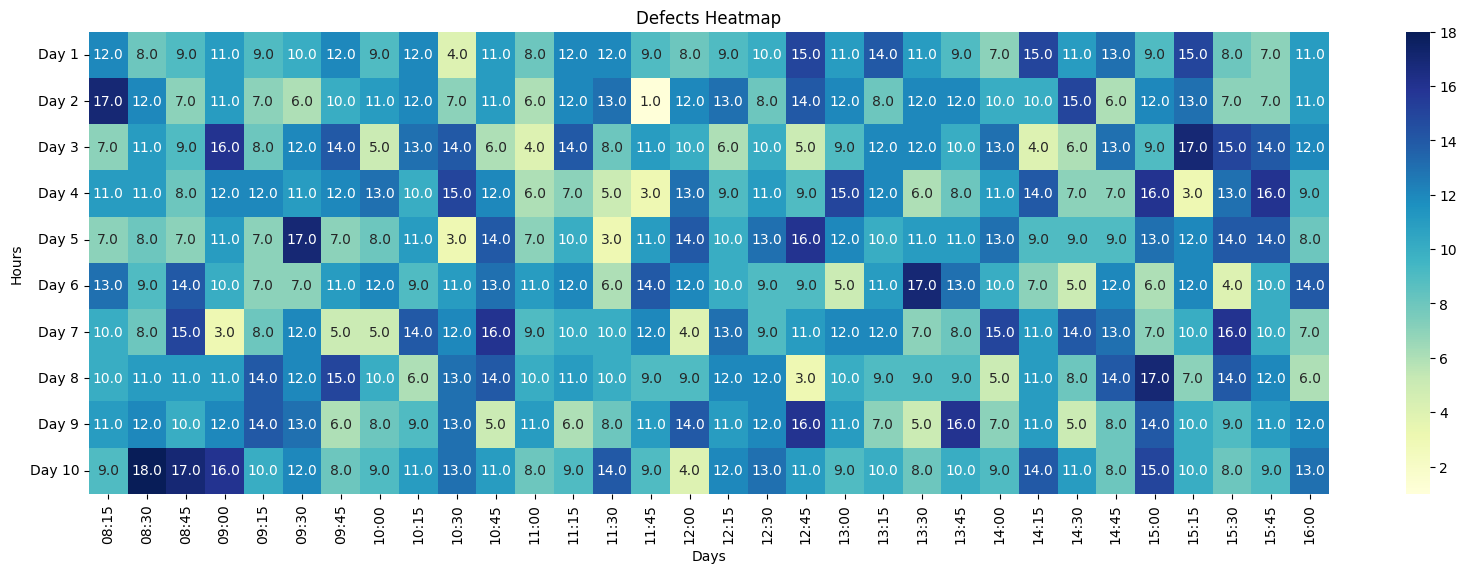

In [25]:
# heatmap with seaborn
plt.figure(figsize=(20, 6))
sns.heatmap(agg_data.iloc[:, 1:].astype(float).T, cmap='YlGnBu', annot=True, fmt=".1f", xticklabels=agg_data['Hour'], yticklabels=[f'Day {day}' for day in data['Day'].unique()])
plt.title('Defects Heatmap')
plt.xlabel('Days')
plt.yticks(rotation=0)
plt.ylabel('Hours')
plt.show()

In [12]:
# heatmap with plotly
fig = px.imshow(agg_data.iloc[:, 1:].astype(float).T, 
                labels=dict(x="Hours", y="Days", color="Defects"),
                x=agg_data['Hour'],
                y=[f'Day {day}' for day in data['Day'].unique()],
                color_continuous_scale='YlGnBu',
                text_auto=".1f")
fig.update_layout(title='Defects Heatmap', xaxis_title='Hours', yaxis_title='Days')
fig.show()


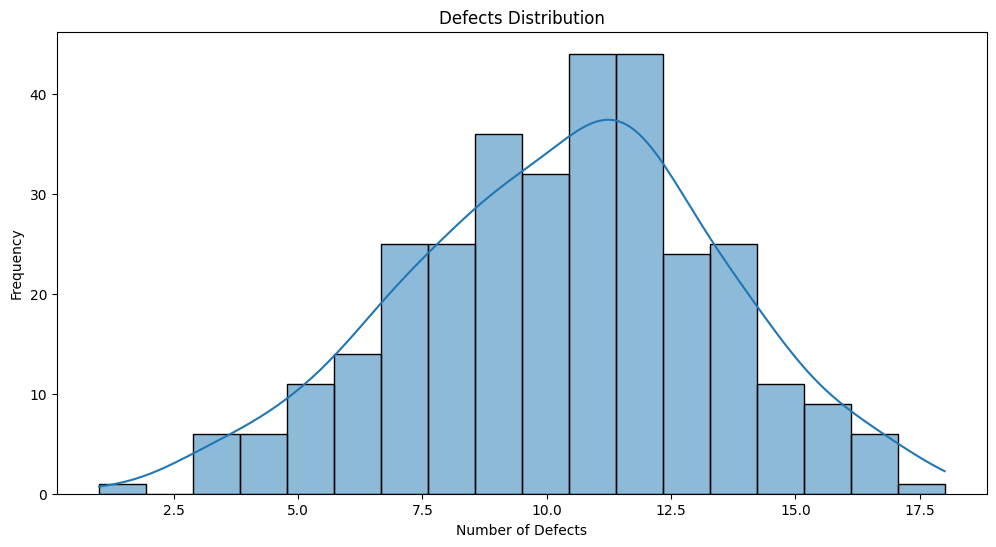

In [86]:
# histogram with seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data['Defects'], bins=18, kde=True)
plt.title('Defects Distribution')
plt.xlabel('Number of Defects')
plt.ylabel('Frequency')
plt.show()


In [6]:
# histogram with plotly
fig = px.histogram(data, x='Defects', nbins=18, title='Defects Distribution', marginal='box', opacity=0.7)
fig.update_layout(xaxis_title='Number of Defects', yaxis_title='Frequency')
fig.show()